In [74]:
import nltk
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction
from nltk.translate.meteor_score import meteor_score
from rouge_score import rouge_scorer
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [75]:
nltk.download('punkt')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to /Users/user/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/user/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [64]:
file_path = '/Users/user/Documents/D2I/responses_eval.csv'
data = pd.read_csv(file_path)
data.columns = ['generated', 'reference']
generated_responses = data['generated'].tolist()
reference_responses = data['reference'].tolist()


In [65]:
bleu_scores = []
rouge_scores = []
meteor_scores = []
smoothing_function = SmoothingFunction()
for generated, reference in zip(generated_responses, reference_responses):
    generated = str(generated) if pd.notna(generated) else ""
    reference = str(reference) if pd.notna(reference) else ""

    generated_words = generated.split()
    reference_words = reference.split()
    

    bleu_score = sentence_bleu([reference_words], generated_words, smoothing_function=smoothing_function.method1)
    bleu_scores.append(bleu_score)
    scorer = rouge_scorer.RougeScorer(['rouge1', 'rougeL'], use_stemmer=True)
    rouge_score = scorer.score(reference, generated)
    rouge_scores.append(rouge_score)
    met_score = meteor_score([reference_words], generated_words)
    meteor_scores.append(met_score)
    

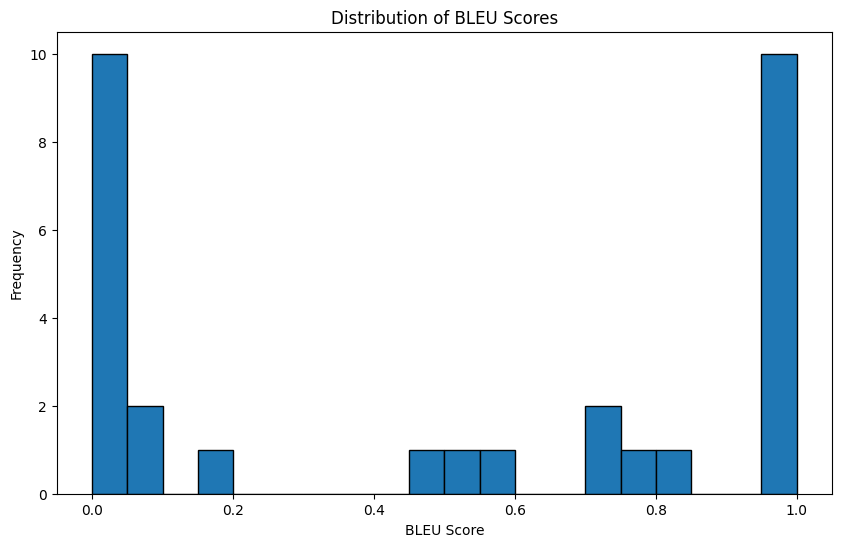

In [67]:
rouge1_scores = [score['rouge1'].fmeasure for score in rouge_scores]
rougeL_scores = [score['rougeL'].fmeasure for score in rouge_scores]

plt.figure(figsize=(10, 6))
plt.hist(bleu_scores, bins=20, edgecolor='black')
plt.title('Distribution of BLEU Scores')
plt.xlabel('BLEU Score')
plt.ylabel('Frequency')
plt.show()

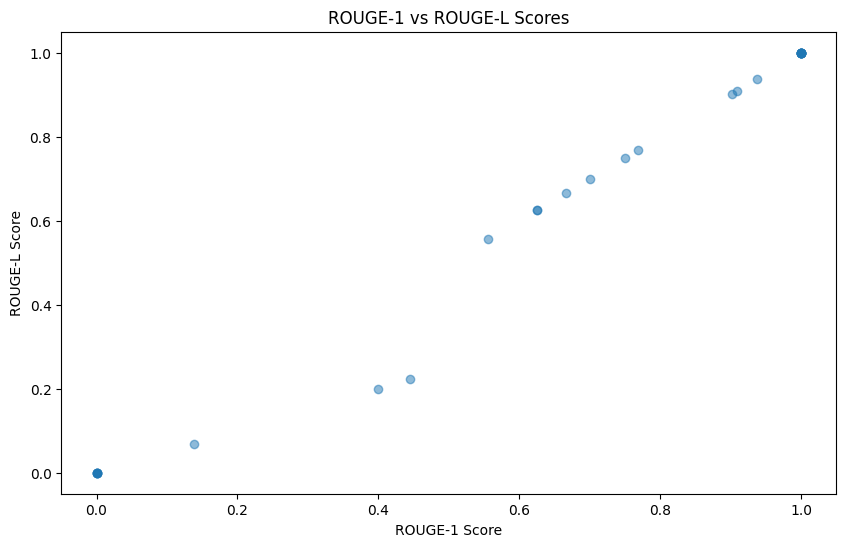

In [68]:
plt.figure(figsize=(10, 6))
plt.scatter(rouge1_scores, rougeL_scores, alpha=0.5)
plt.title('ROUGE-1 vs ROUGE-L Scores')
plt.xlabel('ROUGE-1 Score')
plt.ylabel('ROUGE-L Score')
plt.show()

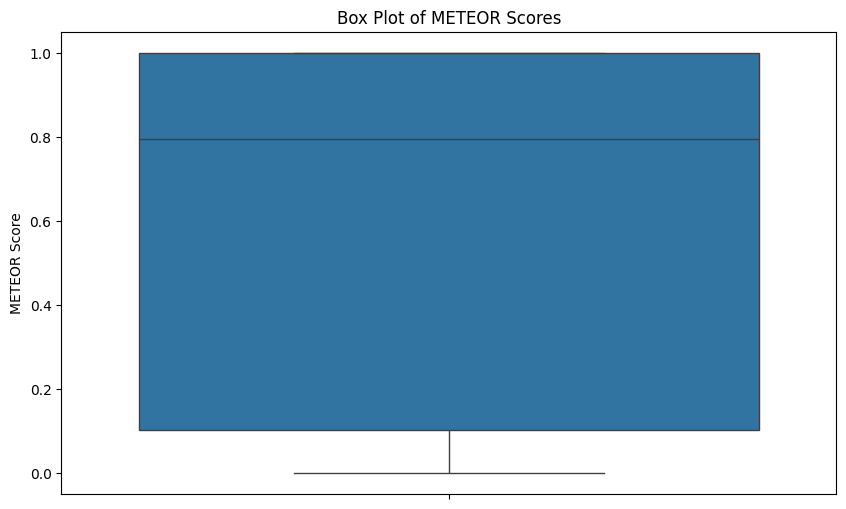

In [69]:
plt.figure(figsize=(10, 6))
sns.boxplot(meteor_scores)
plt.title('Box Plot of METEOR Scores')
plt.ylabel('METEOR Score')
plt.show()

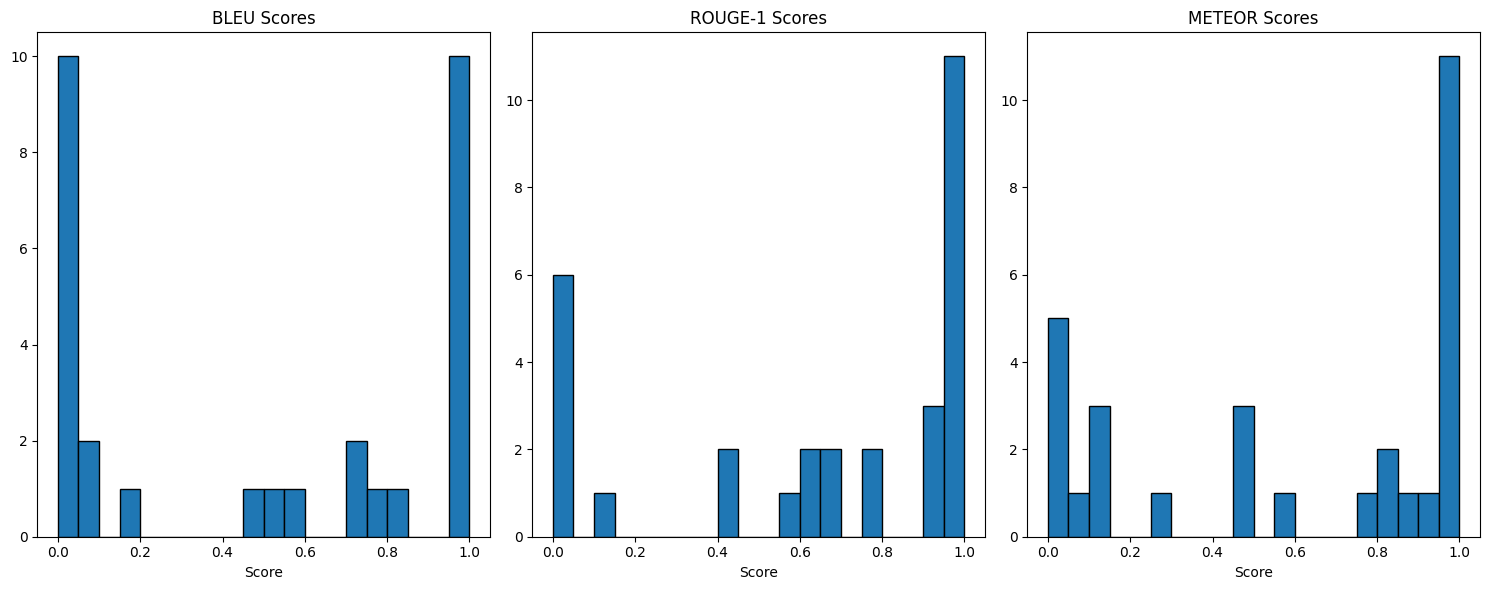

In [70]:
plt.figure(figsize=(15, 6))

plt.subplot(131)
plt.hist(bleu_scores, bins=20, edgecolor='black')
plt.title('BLEU Scores')
plt.xlabel('Score')

plt.subplot(132)
plt.hist(rouge1_scores, bins=20, edgecolor='black')
plt.title('ROUGE-1 Scores')
plt.xlabel('Score')

plt.subplot(133)
plt.hist(meteor_scores, bins=20, edgecolor='black')
plt.title('METEOR Scores')
plt.xlabel('Score')

plt.tight_layout()
plt.show()


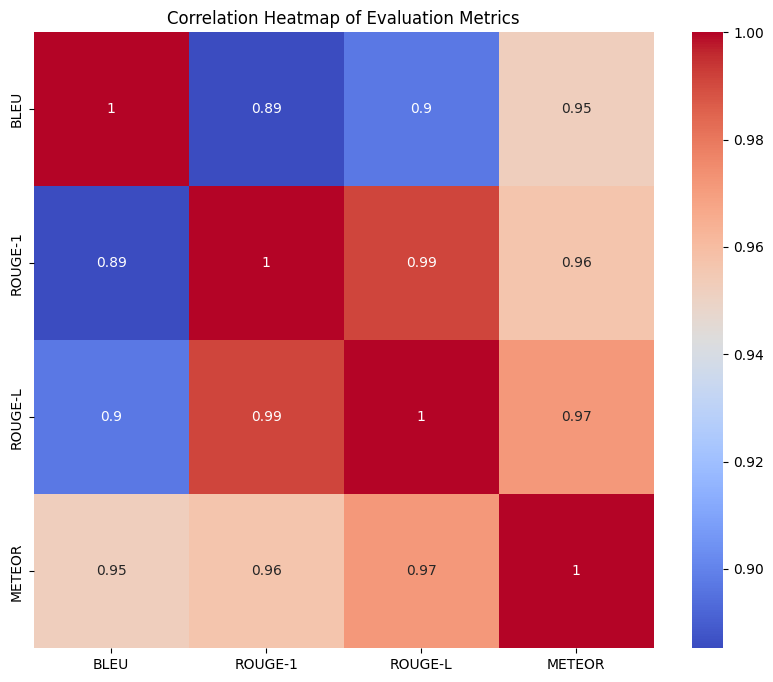

In [72]:
import numpy as np
correlation_matrix = np.corrcoef([bleu_scores, rouge1_scores, rougeL_scores, meteor_scores])
labels = ['BLEU', 'ROUGE-1', 'ROUGE-L', 'METEOR']

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', xticklabels=labels, yticklabels=labels)
plt.title('Correlation Heatmap of Evaluation Metrics')
plt.show()

In [83]:
import pandas as pd
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction
from rouge_score import rouge_scorer
from nltk.translate.meteor_score import meteor_score

def simple_baseline(reference):
    first_sentence = reference.split('.')[0] + '.'
    return first_sentence

file_path = '/Users/user/Documents/D2I/responses_eval.csv'
data = pd.read_csv(file_path)
data.columns = ['generated', 'reference']
generated_responses = data['generated'].tolist()
reference_responses = data['reference'].tolist()

bleu_scores = []
rouge_scores = []
meteor_scores = []
baseline_bleu_scores = []
baseline_rouge_scores = []
baseline_meteor_scores = []

smoothing_function = SmoothingFunction()
scorer = rouge_scorer.RougeScorer(['rouge1', 'rougeL'], use_stemmer=True)

for generated, reference in zip(generated_responses, reference_responses):
    generated = str(generated) if pd.notna(generated) else ""
    reference = str(reference) if pd.notna(reference) else ""

    generated_words = generated.split()
    reference_words = reference.split()

    # Calculate scores for the generated response
    bleu_score = sentence_bleu([reference_words], generated_words, smoothing_function=smoothing_function.method1)
    bleu_scores.append(bleu_score)

    rouge_score = scorer.score(reference, generated)
    rouge_scores.append(rouge_score)

    met_score = meteor_score([reference_words], generated_words)
    meteor_scores.append(met_score)

    # Calculate scores for the baseline response
    baseline_response = simple_baseline(reference)
    baseline_words = baseline_response.split()

    baseline_bleu = sentence_bleu([reference_words], baseline_words, smoothing_function=smoothing_function.method1)
    baseline_bleu_scores.append(baseline_bleu)

    baseline_rouge = scorer.score(reference, baseline_response)
    baseline_rouge_scores.append(baseline_rouge)

    baseline_meteor = meteor_score([reference_words], baseline_words)
    baseline_meteor_scores.append(baseline_meteor)

avg_bleu = sum(bleu_scores) / len(bleu_scores)
avg_rouge1 = sum(score['rouge1'].fmeasure for score in rouge_scores) / len(rouge_scores)
avg_rougeL = sum(score['rougeL'].fmeasure for score in rouge_scores) / len(rouge_scores)
avg_meteor = sum(meteor_scores) / len(meteor_scores)

avg_baseline_bleu = sum(baseline_bleu_scores) / len(baseline_bleu_scores)
avg_baseline_rouge1 = sum(score['rouge1'].fmeasure for score in baseline_rouge_scores) / len(baseline_rouge_scores)
avg_baseline_rougeL = sum(score['rougeL'].fmeasure for score in baseline_rouge_scores) / len(baseline_rouge_scores)
avg_baseline_meteor = sum(baseline_meteor_scores) / len(baseline_meteor_scores)

print("Generated Response Scores:")
print(f"BLEU: {avg_bleu:.4f}")
print(f"ROUGE-1: {avg_rouge1:.4f}")
print(f"ROUGE-L: {avg_rougeL:.4f}")
print(f"METEOR: {avg_meteor:.4f}")

print("\nBaseline Scores:")
print(f"BLEU: {avg_baseline_bleu:.4f}")
print(f"ROUGE-1: {avg_baseline_rouge1:.4f}")
print(f"ROUGE-L: {avg_baseline_rougeL:.4f}")
print(f"METEOR: {avg_baseline_meteor:.4f}")


Generated Response Scores:
BLEU: 0.5005
ROUGE-1: 0.6474
ROUGE-L: 0.6310
METEOR: 0.5968

Baseline Scores:
BLEU: 0.7723
ROUGE-1: 0.8948
ROUGE-L: 0.8948
METEOR: 0.8193


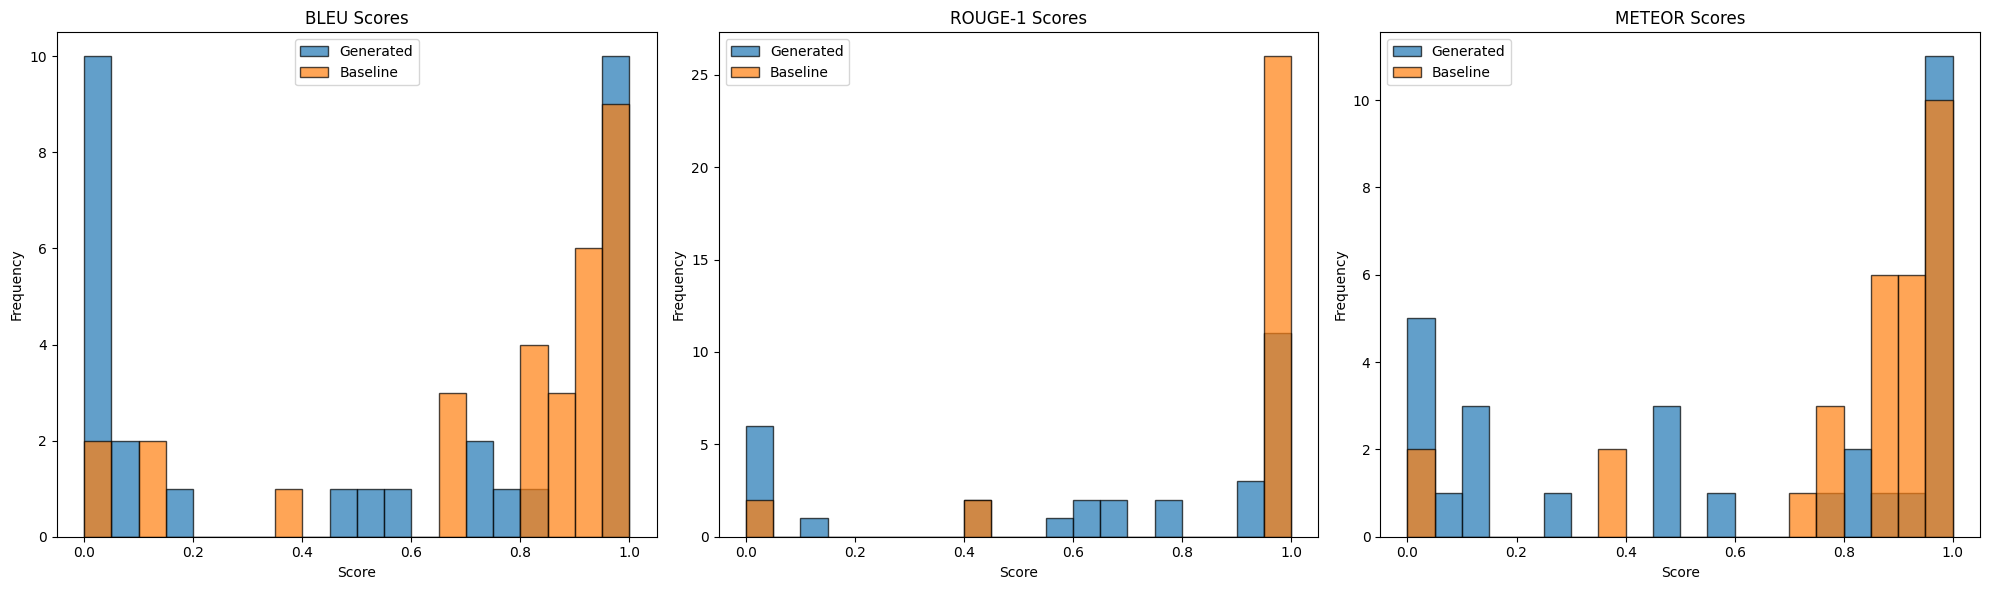

/var/folders/jh/16vzm2y9511d5n3kgmx7t_6h0000gn/T/ipykernel_6156/3063133119.py:44: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([bleu_scores, baseline_bleu_scores], labels=['Generated', 'Baseline'])
/var/folders/jh/16vzm2y9511d5n3kgmx7t_6h0000gn/T/ipykernel_6156/3063133119.py:49: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([rouge1_scores, baseline_rouge1_scores], labels=['Generated', 'Baseline'])
/var/folders/jh/16vzm2y9511d5n3kgmx7t_6h0000gn/T/ipykernel_6156/3063133119.py:54: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([meteor_scores, baseline_meteor_scores], labels=['Generated

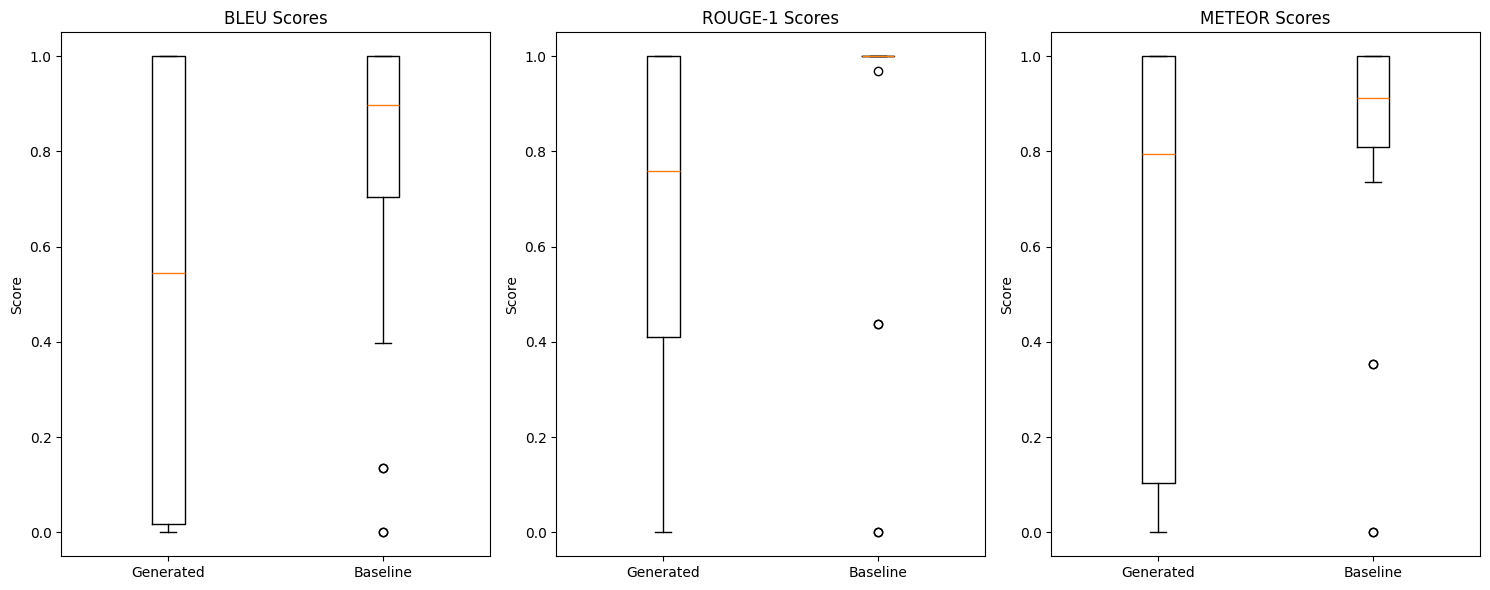

In [84]:
import matplotlib.pyplot as plt
import numpy as np

# Extract ROUGE-1 scores
rouge1_scores = [score['rouge1'].fmeasure for score in rouge_scores]
baseline_rouge1_scores = [score['rouge1'].fmeasure for score in baseline_rouge_scores]

plt.figure(figsize=(20, 6))

# BLEU Scores
plt.subplot(131)
plt.hist(bleu_scores, bins=20, alpha=0.7, label='Generated', edgecolor='black')
plt.hist(baseline_bleu_scores, bins=20, alpha=0.7, label='Baseline', edgecolor='black')
plt.title('BLEU Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.legend()

# ROUGE-1 Scores
plt.subplot(132)
plt.hist(rouge1_scores, bins=20, alpha=0.7, label='Generated', edgecolor='black')
plt.hist(baseline_rouge1_scores, bins=20, alpha=0.7, label='Baseline', edgecolor='black')
plt.title('ROUGE-1 Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.legend()

# METEOR Scores
plt.subplot(133)
plt.hist(meteor_scores, bins=20, alpha=0.7, label='Generated', edgecolor='black')
plt.hist(baseline_meteor_scores, bins=20, alpha=0.7, label='Baseline', edgecolor='black')
plt.title('METEOR Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()

# Box plot comparison
plt.figure(figsize=(15, 6))

plt.subplot(131)
plt.boxplot([bleu_scores, baseline_bleu_scores], labels=['Generated', 'Baseline'])
plt.title('BLEU Scores')
plt.ylabel('Score')

plt.subplot(132)
plt.boxplot([rouge1_scores, baseline_rouge1_scores], labels=['Generated', 'Baseline'])
plt.title('ROUGE-1 Scores')
plt.ylabel('Score')

plt.subplot(133)
plt.boxplot([meteor_scores, baseline_meteor_scores], labels=['Generated', 'Baseline'])
plt.title('METEOR Scores')
plt.ylabel('Score')

plt.tight_layout()
plt.show()

# Scatter plot for ROUGE-1 vs ROUGE-L
# plt.figure(figsize=(10, 6))
# rougeL_scores = [score['rougeL'].fmeasure for score in rouge_scores]
# baseline_rougeL_scores = [score['rougeL'].fmeasure for score in baseline_rouge_scores]

# plt.scatter(rouge1_scores, rougeL_scores, alpha=0.5, label='Generated')
# plt.scatter(baseline_rouge1_scores, baseline_rougeL_scores, alpha=0.5, label='Baseline')
# plt.title('ROUGE-1 vs ROUGE-L Scores')
# plt.xlabel('ROUGE-1 Score')
# plt.ylabel('ROUGE-L Score')
# plt.legend()
# plt.show()

